In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = {
'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [3]:
df = pd.DataFrame(dataset,columns=['Id','Age','Income','Gender','MaritalStatus','Buys'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             14 non-null     int64 
 1   Age            14 non-null     object
 2   Income         14 non-null     object
 3   Gender         14 non-null     object
 4   MaritalStatus  14 non-null     object
 5   Buys           14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [5]:
df

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


Tekeaway -->  9 persons bought the cosmetic products and 5 didnt

In [6]:
df = df.drop('Id',axis=1)

In [7]:
df

,Age,Income,Gender,MaritalStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [8]:
df["Buys"].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

<AxesSubplot:xlabel='Buys', ylabel='count'>

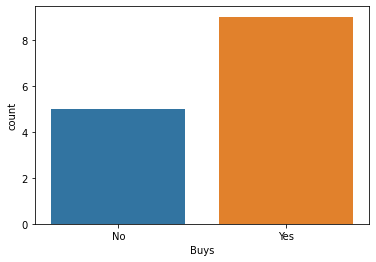

In [9]:
sns.countplot(data=df, x='Buys')

In [10]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.iloc[:,:-1]
X=X.apply(le.fit_transform)
print("Age with encodd value :",list( zip(df.iloc[:,0], X.iloc[:,0])))
print("\nIncome with encoded value :",list( zip(df.iloc[:,1], X.iloc[:,1])))
print("\nGender with encoded value :",list( zip(df.iloc[:,2], X.iloc[:,2])))
print("\nmaritialStatus with encoded value :",list( zip(df.iloc[:,3], X.iloc[:,3])))

Age with encodd value : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with encoded value : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with encoded value : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus with encoded value : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [11]:
X


,Age,Income,Gender,MaritalStatus
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [12]:
y = df.iloc[:,-1]

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
test_x=np.array([1,1,0,0])
y_pred=dtc.predict([test_x])
y_pred[0]
print("Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]\n", test_x," is ",y_pred[0])

Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]
 [1 1 0 0]  is  Yes


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


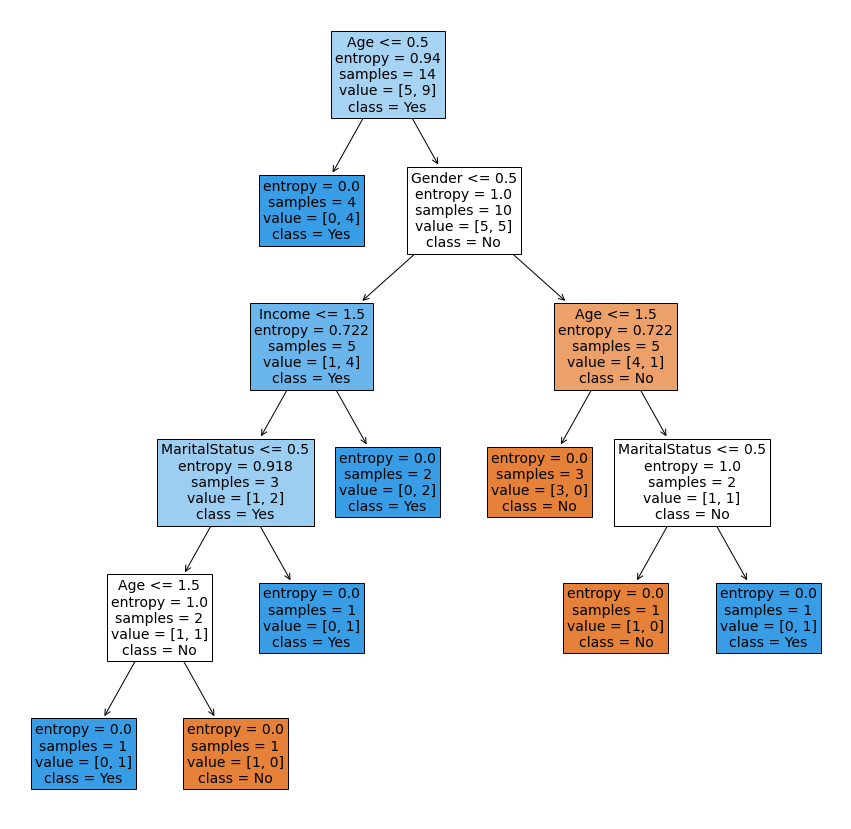

In [16]:
from sklearn.tree import plot_tree
D=plt.figure(figsize=(15,15))
b=plot_tree(dtc,feature_names=df.columns,fontsize=14,filled=True,class_names=['No','Yes'])

In [18]:
test=np.array([1,1,0,0])
y_pred=dtc.predict([test])

y_pred[0]

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Yes'

conclusion:

    since our dataset contains most of the classification value, we have to use decision tree model here because most of the featute are dependent on each other as we have seen the data and analyse it.
    
    we can see that from decision tree diagram whar=t parameter depends on what and how.
    
    so for the data  [Age < 21, Income = Low, Gender = Female, Marital Status = Married]  it is predicted as it will buy as yes
    
    